#  Finding the average sizes of user requests for each user (in kWh) 

1. Group data set by the hour of arrival
2. Calculate average request size for each hour
3. Plot the change dynamic into a graph

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import numpy as np
import seaborn as sns

In [2]:
#changong data types to datetime format for users table
#dropping sessions with requests higher than 90 kWh (there are no cars with batteries bigger than 90 kWh)

users_to_clean = pd.read_csv('./data/users.csv')
users_to_clean['Modified'] = pd.to_datetime(users_to_clean.modifiedAt, infer_datetime_format=True)  
users_to_clean['Departure'] = pd.to_datetime(users_to_clean.requestedDeparture, infer_datetime_format=True)

users_drop = users_to_clean.drop(columns = ['requestedDeparture', 'modifiedAt', 'Unnamed: 0'])
users = users_drop[users_drop.kWhRequested <= 90]
users.head()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
0,350,59.5,170,550,True,22,2018-04-30 15:08:54+00:00,2018-05-01 00:17:49+00:00
1,400,8.0,20,60,True,61,2018-05-07 14:38:32+00:00,2018-05-07 15:38:18+00:00
2,400,8.0,20,648,True,61,2018-05-07 15:40:44+00:00,2018-05-08 01:26:18+00:00
3,400,28.0,70,648,True,61,2018-05-07 15:41:04+00:00,2018-05-08 01:26:18+00:00
4,350,17.5,50,546,True,22,2018-05-11 15:18:23+00:00,2018-05-12 00:23:01+00:00


In [3]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16820 entries, 0 to 17133
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   WhPerMile         16820 non-null  int64              
 1   kWhRequested      16820 non-null  float64            
 2   milesRequested    16820 non-null  int64              
 3   minutesAvailable  16820 non-null  int64              
 4   paymentRequired   16820 non-null  bool               
 5   userID            16820 non-null  int64              
 6   Modified          16820 non-null  datetime64[ns, UTC]
 7   Departure         16820 non-null  datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](2), float64(1), int64(4)
memory usage: 1.0 MB


In [4]:
hours = list(range(24))

In [5]:
users.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,16820.000000,16820.000000,16820.000000,16820.000000,16820.000000
mean,367.755767,20.087768,60.563020,282.444233,1111.334602
std,100.522602,14.774043,52.962184,179.516089,940.484846
min,200.000000,2.000000,10.000000,1.000000,1.000000
25%,292.000000,8.000000,20.000000,129.000000,564.000000
50%,400.000000,16.000000,40.000000,253.000000,850.000000
75%,400.000000,27.000000,80.000000,422.000000,1249.000000
max,600.000000,90.000000,300.000000,1913.000000,6952.000000


## Group data by user ID

In [6]:
users_ID = users.groupby(['userID'])
users_ID.describe().T 

userID                   1           17          22     43     45    \
WhPerMile        count    1.0    2.000000   70.000000    1.0    1.0   
                 mean   500.0  346.000000  352.142857  217.0  250.0   
                 std      NaN    0.000000   10.199866    NaN    NaN   
                 min    500.0  346.000000  350.000000  217.0  250.0   
                 25%    500.0  346.000000  350.000000  217.0  250.0   
                 50%    500.0  346.000000  350.000000  217.0  250.0   
                 75%    500.0  346.000000  350.000000  217.0  250.0   
                 max    500.0  346.000000  400.000000  217.0  250.0   
kWhRequested     count    1.0    2.000000   70.000000    1.0    1.0   
                 mean     5.0   10.380000   35.257857   43.4   17.5   
                 std      NaN    4.893179   18.783520    NaN    NaN   
                 min      5.0    6.920000   10.500000   43.4   17.5   
                 25%      5.0    8.650000   22.662500   43.4   17.5   
                 50%      5.0   10.380000   31.500000   43.4   17.5   
                 75%      5.0   12.110000   42.000000   43.4   17.5   
                 max      5.0   13.840000   84.000000   43.4   17.5   
milesRequested   count    1.0    2.000000   70.000000    1.0    1.0   
                 mean    10.0   30.000000   99.471429  200.0   70.0   
                 std      NaN   14.142136   50.679362    NaN    NaN   
                 min     10.0   20.000000   30.000000  200.0   70.0   
                 25%     10.0   25.000000   64.750000  200.0   70.0   
                 50%     10.0   30.000000   90.000000  200.0   70.0   
                 75%     10.0   35.000000  120.000000  200.0   70.0   
                 max     10.0   40.000000  230.000000  200.0   70.0   
minutesAvailable count    1.0    2.000000   70.000000    1.0    1.0   
                 mean   150.0   51.000000  458.071429  469.0  134.0   
                 std      NaN   29.698485  130.975860    NaN    NaN   
                 min    150.0   30.000000  187.000000  469.0  134.0   
                 25%    150.0   40.500000  331.500000  469.0  134.0   
                 50%    150.0   51.000000  532.000000  469.0  134.0   
                 75%    150.0   61.500000  546.000000  469.0  134.0   
                 max    150.0   72.000000  648.000000  469.0  134.0   

userID                        58          61          65          66    \
WhPerMile        count   11.000000   56.000000    3.000000   50.000000   
                 mean   300.000000  258.035714  360.000000  368.720000   
                 std      0.000000   34.081167    0.000000   40.299410   
                 min    300.000000  250.000000  360.000000  313.000000   
                 25%    300.000000  250.000000  360.000000  313.000000   
                 50%    300.000000  250.000000  360.000000  400.000000   
                 75%    300.000000  250.000000  360.000000  400.000000   
                 max    300.000000  400.000000  360.000000  400.000000   
kWhRequested     count   11.000000   56.000000    3.000000   50.000000   
                 mean    72.818182   14.000000   37.200000   12.737600   
                 std     23.318740   10.901209   20.784610    5.341483   
                 min      6.000000    5.000000   25.200000    3.570000   
                 25%     70.500000    7.500000   25.200000    8.000000   
                 50%     81.000000   10.000000   25.200000   12.520000   
                 75%     82.500000   17.500000   43.200000   16.000000   
                 max     90.000000   62.500000   61.200000   28.000000   
milesRequested   count   11.000000   56.000000    3.000000   50.000000   
                 mean   242.727273   54.821429  103.333333   34.800000   
                 std     77.729133   43.274644   57.735027   14.032033   
                 min     20.000000   20.000000   70.000000   10.000000   
                 25%    235.000000   30.000000   70.000000   20.000000   
                 50%    270.

# Looking into Smart users (each graph for a single userID)

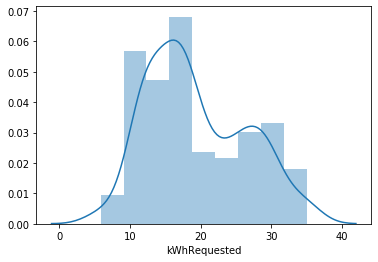

In [268]:
# looking into another user

one_user = users[users.userID == 1470]
x = pd.Series(one_user.kWhRequested, name="kWhRequested")
ax = sns.distplot(x)


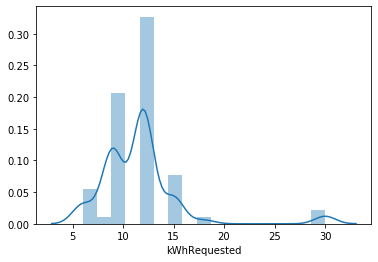

In [47]:
# looking into another user

one_user = users[users.userID == 4701]
x = pd.Series(one_user.kWhRequested, name="kWhRequested")
ax = sns.distplot(x)


In [48]:
one_user.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,65.000000,65.000000,65.000000,65.000000,65.0
mean,301.538462,11.569231,38.461538,354.415385,4701.0
std,12.403473,4.149432,13.945291,103.206391,0.0
min,300.000000,6.000000,20.000000,82.000000,4701.0
25%,300.000000,9.000000,30.000000,307.000000,4701.0
50%,300.000000,12.000000,40.000000,397.000000,4701.0
75%,300.000000,12.000000,40.000000,400.000000,4701.0
max,400.000000,30.000000,100.000000,554.000000,4701.0


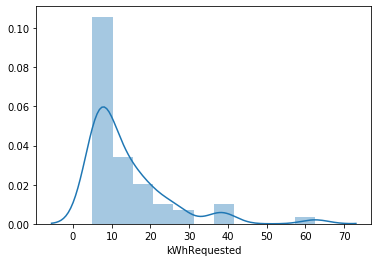

In [46]:
# looking into another user

one_user = users[users.userID == 61]
x = pd.Series(one_user.kWhRequested, name="kWhRequested")
ax = sns.distplot(x)

In [275]:
one_user.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,309.000000,309.000000,309.000000,309.000000,309.0
mean,345.307443,7.058252,20.809061,241.181230,891.0
std,78.245696,1.612604,5.252623,95.620935,0.0
min,200.000000,3.000000,10.000000,36.000000,891.0
25%,300.000000,6.000000,20.000000,206.000000,891.0
50%,300.000000,6.000000,20.000000,304.000000,891.0
75%,400.000000,8.000000,20.000000,310.000000,891.0
max,500.000000,12.000000,60.000000,475.000000,891.0


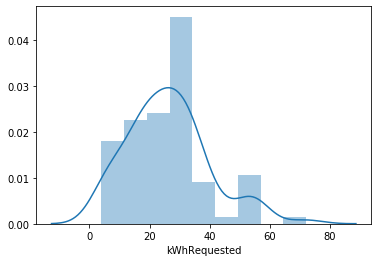

In [45]:
# looking into another user

one_user = users[users.userID == 162]
x = pd.Series(one_user.kWhRequested, name="kWhRequested")
ax = sns.distplot(x)

In [282]:
one_user.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,259.000000,259.000000,259.000000,259.000000,259.0
mean,486.146718,9.003089,18.629344,142.050193,324.0
std,92.569321,2.213829,3.167432,55.154903,0.0
min,400.000000,4.000000,10.000000,38.000000,324.0
25%,400.000000,8.000000,20.000000,117.000000,324.0
50%,444.000000,8.000000,20.000000,145.000000,324.0
75%,600.000000,12.000000,20.000000,167.500000,324.0
max,600.000000,12.000000,20.000000,695.000000,324.0


# Finding cars - model Smart

In [7]:
msk_Smart = (users.kWhRequested < 16.5) & (users.WhPerMile < 321)
msk_Smart

0        False
1        False
2        False
3        False
4        False
         ...  
17129    False
17130    False
17131    False
17132    False
17133    False
Length: 16820, dtype: bool

In [8]:
Smart = users[msk_Smart]
Smart

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,paymentRequired,userID,Modified,Departure
7,250,5.00,20,611,True,61,2018-05-15 00:06:56+00:00,2018-05-15 10:17:39+00:00
8,250,5.00,20,83,True,61,2018-05-16 00:13:07+00:00,2018-05-16 01:35:53+00:00
45,250,5.00,20,537,True,61,2018-06-18 14:33:17+00:00,2018-06-18 23:30:04+00:00
46,250,5.00,20,593,True,61,2018-06-18 14:33:33+00:00,2018-06-19 00:26:04+00:00
48,200,16.00,80,231,True,162,2018-06-18 15:26:05+00:00,2018-06-18 19:15:43+00:00
...,...,...,...,...,...,...,...,...
16990,300,9.00,30,554,True,4701,2020-03-17 14:26:35+00:00,2020-03-17 23:40:24+00:00
17045,236,7.08,30,389,True,1085,2020-04-19 02:54:10+00:00,2020-04-19 04:38:13+00:00
17051,236,11.80,50,112,True,1085,2020-05-05 02:08:27+00:00,2020-05-05 04:00:13+00:00
17088,300,15.00,50,625,True,1526,2020-06-09 16:28:32+00:00,2020-06-10 02:49:21+00:00


In [32]:
Smart.describe()

,WhPerMile,kWhRequested,milesRequested,minutesAvailable,userID
count,2593.000000,2593.000000,2593.000000,2593.000000,2593.000000
mean,268.372541,10.013085,38.361358,279.514848,1006.268029
std,35.971890,3.922369,17.336075,158.693914,968.340280
min,200.000000,2.000000,10.000000,15.000000,58.000000
25%,250.000000,6.000000,20.000000,148.000000,559.000000
50%,275.000000,10.000000,40.000000,249.000000,697.000000
75%,300.000000,14.000000,50.000000,404.000000,1126.000000
max,313.000000,16.310000,80.000000,1021.000000,6638.000000


In [10]:
len(Smart)

2593

In [12]:
len(Smart.userID.unique())

116

In [338]:
tesla_wpm = users[msk_tesla_wpm]
len(tesla_wpm.userID.unique())

326

In [13]:
Smart_users = Smart.groupby(['userID'])
Smart_users.describe().T 

userID                   58          61          66          67          68    \
WhPerMile        count    1.0   39.000000   15.000000    3.000000   59.000000   
                 mean   300.0  250.000000  313.000000  250.000000  230.271186   
                 std      NaN    0.000000    0.000000    0.000000   19.973975   
                 min    300.0  250.000000  313.000000  250.000000  200.000000   
                 25%    300.0  250.000000  313.000000  250.000000  214.000000   
                 50%    300.0  250.000000  313.000000  250.000000  214.000000   
                 75%    300.0  250.000000  313.000000  250.000000  250.000000   
                 max    300.0  250.000000  313.000000  250.000000  250.000000   
kWhRequested     count    1.0   39.000000   15.000000    3.000000   59.000000   
                 mean     6.0    8.910256   12.102667    5.000000   13.041356   
                 std      NaN    3.479019    2.003014    0.000000    2.942462   
                 min      6.0    5.000000    9.390000    5.000000    6.000000   
                 25%      6.0    6.250000   10.955000    5.000000   12.500000   
                 50%      6.0    7.500000   12.520000    5.000000   14.980000   
                 75%      6.0   11.250000   12.520000    5.000000   15.000000   
                 max      6.0   15.000000   15.650000    5.000000   16.000000   
milesRequested   count    1.0   39.000000   15.000000    3.000000   59.000000   
                 mean    20.0   35.641026   38.666667   20.000000   57.118644   
                 std      NaN   13.916078    6.399405    0.000000   14.148333   
                 min     20.0   20.000000   30.000000   20.000000   30.000000   
                 25%     20.0   25.000000   35.000000   20.000000   50.000000   
                 50%     20.0   30.000000   40.000000   20.000000   60.000000   
                 75%     20.0   45.000000   40.000000   20.000000   70.000000   
                 max     20.0   60.000000   50.000000   20.000000   80.000000   
minutesAvailable count    1.0   39.000000   15.000000    3.000000   59.000000   
                 mean   867.0  613.179487  478.800000  614.333333  290.305085   
                 std      NaN  101.099449   95.255446   42.500980   80.183250   
                 min    867.0   83.000000  193.000000  572.000000   46.000000   
                 25%    867.0  608.000000  442.000000  593.000000  256.000000   
                 50%    867.0  626.000000  525.000000  614.000000  275.000000   
                 75%    867.0  626.000000  532.000000  635.500000  322.000000   
                 max    867.0  908.000000  549.000000  657.000000  437.000000   

userID                        69     159         162         171         176   \
WhPerMile        count    9.000000    1.0   13.000000   18.000000    3.000000   
                 mean   211.111111  200.0  200.000000  294.444444  283.333333   
                 std     33.333333    NaN    0.000000   16.169042   28.867513   
                 min    200.000000  200.0  200.000000  250.000000  250.000000   
                 25%    200.000000  200.0  200.000000  300.000000  275.000000   
                 50%    200.000000  200.0  200.000000  300.000000  300.000000   
                 75%    200.000000  200.0  200.000000  300.000000  300.000000   
                 max    300.000000  200.0  200.000000  300.000000  300.000000   
kWhRequested     count    9.000000    1.0   13.000000   18.000000    3.000000   
                 mean    13.444444    4.0   11.538462   13.388889   14.166667   
                 std      3.126944    NaN    5.237929    2.323509    1.443376   
                 min      9.000000    4.0    4.000000    9.000000   12.500000   
                 25%     10.000000    4.0    6.000000   12.125000   13.750000   
                 50%     16.000000    4.0   14.000000   15.000000   15.000000   
                 75%     16.000000    4.0   16.000000   15.000000   15.000000   
                 max     16.00

7         5.00
8         5.00
45        5.00
46        5.00
48       16.00
         ...  
16990     9.00
17045     7.08
17051    11.80
17088    15.00
17122     5.80
Name: kWhRequested, Length: 2593, dtype: float64

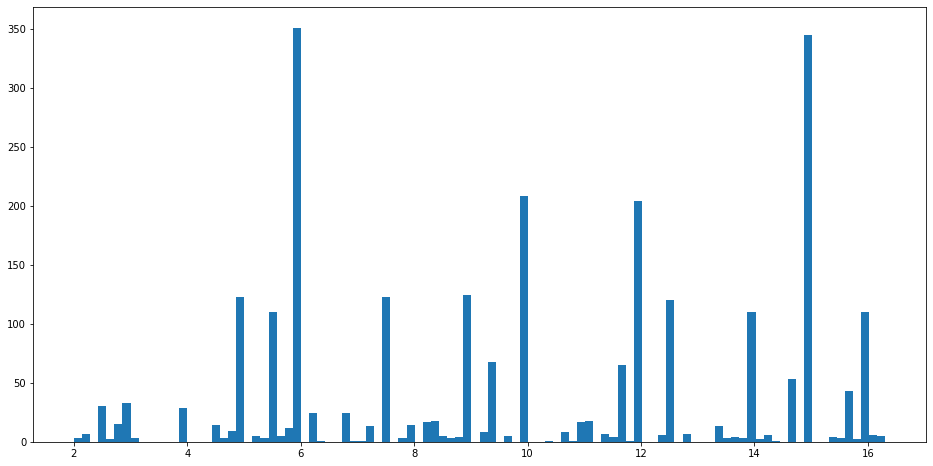

In [14]:
ax, fig = plt.subplots(figsize = (16, 8))
ax = plt.hist(Smart.kWhRequested, bins = 100)

Smart.kWhRequested

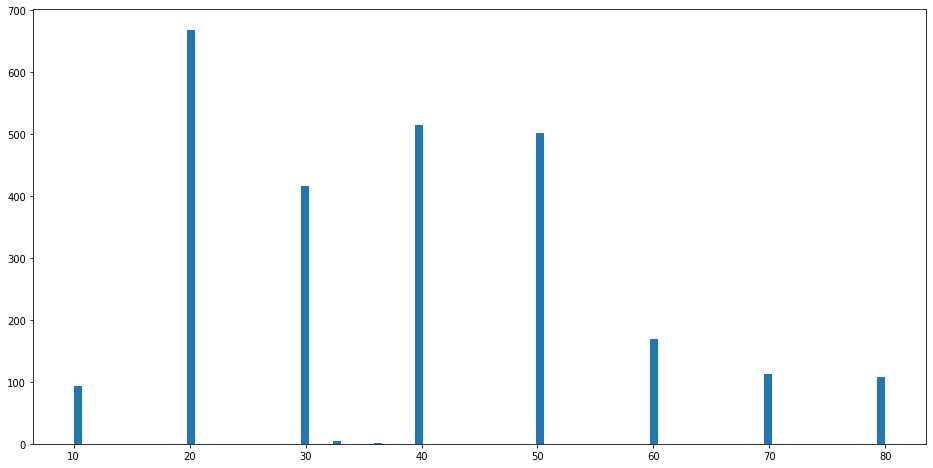

In [17]:
ax, fig = plt.subplots(figsize = (16, 8))
ax = plt.hist(Smart.milesRequested, bins = 100)

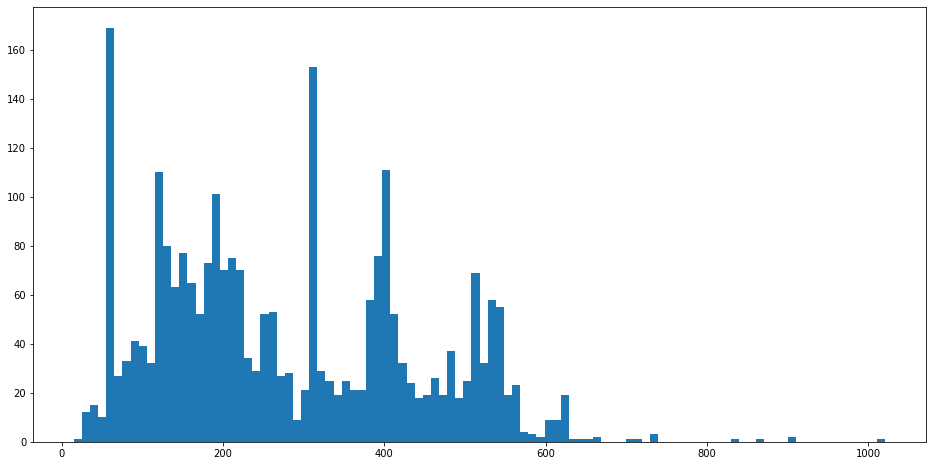

In [18]:
ax, fig = plt.subplots(figsize = (16, 8))
ax = plt.hist(Smart.minutesAvailable, bins = 100)

# Using bootstrapping to check out means distributions for tesla drivrs miles requests

In [35]:
all_data = list(Smart.milesRequested)
len(all_data)
all_data

[20,
 20,
 20,
 20,
 80,
 80,
 30,
 20,
 20,
 50,
 60,
 70,
 80,
 80,
 80,
 20,
 80,
 20,
 50,
 50,
 50,
 20,
 40,
 60,
 50,
 50,
 20,
 20,
 30,
 30,
 20,
 60,
 20,
 20,
 20,
 50,
 50,
 20,
 20,
 60,
 50,
 50,
 70,
 20,
 40,
 50,
 60,
 20,
 50,
 50,
 40,
 40,
 40,
 40,
 40,
 20,
 20,
 50,
 50,
 50,
 10,
 30,
 30,
 20,
 20,
 20,
 50,
 30,
 30,
 30,
 50,
 30,
 40,
 20,
 30,
 20,
 10,
 20,
 30,
 20,
 30,
 20,
 30,
 30,
 30,
 60,
 30,
 50,
 30,
 60,
 30,
 30,
 40,
 60,
 30,
 30,
 60,
 30,
 10,
 30,
 40,
 30,
 60,
 30,
 10,
 60,
 60,
 60,
 50,
 60,
 30,
 30,
 30,
 50,
 50,
 30,
 30,
 30,
 60,
 50,
 50,
 30,
 40,
 60,
 30,
 50,
 10,
 60,
 30,
 30,
 30,
 50,
 30,
 10,
 40,
 40,
 30,
 60,
 30,
 30,
 20,
 20,
 20,
 20,
 10,
 10,
 30,
 30,
 20,
 20,
 30,
 50,
 60,
 20,
 40,
 30,
 40,
 60,
 20,
 60,
 20,
 50,
 60,
 60,
 30,
 20,
 40,
 20,
 50,
 50,
 50,
 60,
 20,
 50,
 50,
 50,
 30,
 50,
 60,
 20,
 20,
 20,
 40,
 50,
 20,
 30,
 60,
 40,
 30,
 60,
 50,
 20,
 60,
 50,
 60,
 30,
 20,
 20,
 30,
 20,


In [29]:
def bootstrap_mean(data, n_samples = 10000):
    bootsrtap_means = []
    for i in range(n_samples):
        bootstrap_sample = np.random.choice(data, size = len(data), replace = True)
        bootsrtap_means.append(np.mean(bootstrap_sample))
    return bootsrtap_means


In [30]:
all_boot_means = bootstrap_mean(all_data)


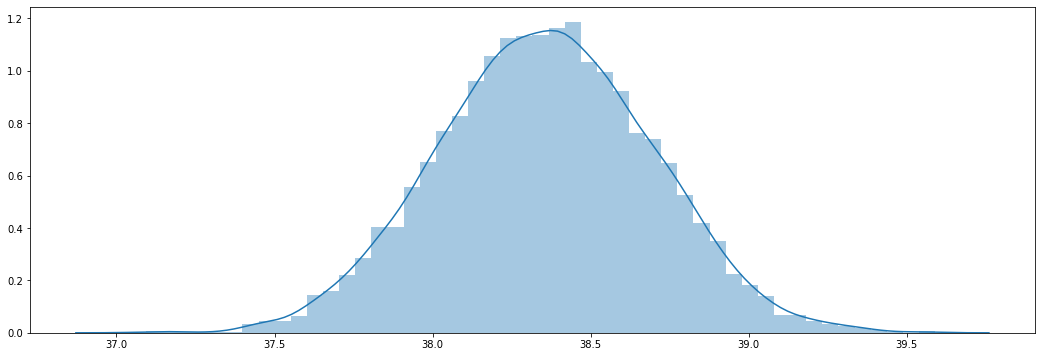

In [31]:
ax, fig = plt.subplots(figsize = (18, 6))
ax = sns.distplot(all_boot_means)
#ax = plt.hist(all_tesla_boot_means)

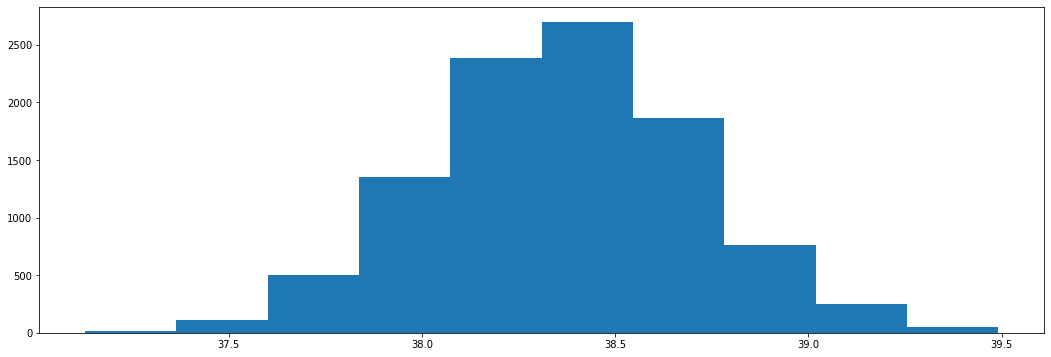

In [23]:
ax, fig = plt.subplots(figsize = (18, 6))
#ax = sns.distplot(all_tesla_boot_means)
ax = plt.hist(all_boot_means)

In [33]:
#variance of bootstrapped means for all tesla users
all_var = np.var(all_data) 
all_var_boot = np.var(all_boot_means)
boot_mean = np.mean(all_boot_means)

print('All Smart users sample mean: 38.36')
print(f'All Smart users bootsrtap sample mean: {boot_mean}')

print(f'Variance of all Smart users charge request: {all_var}')  #why the hell it is so big???
print(f'Variance of all Smart users means: {all_var_boot}')

All Smart users sample mean: 38.36
All Smart users bootsrtap sample mean: 38.35515349016583
Variance of all Smart users charge request: 300.42360509895747
Variance of all Smart users means: 0.11422654615536894


In [391]:
#confidence interval for all tesla users
left = np.percentile(all_tesla_boot_means, 2.5)
right = np.percentile(all_tesla_boot_means, 97.5)
left, right

(42.9259823332318, 44.152304802518024)

# Using bootstrapping to check out means distributions for tesla drivrs kWh requests

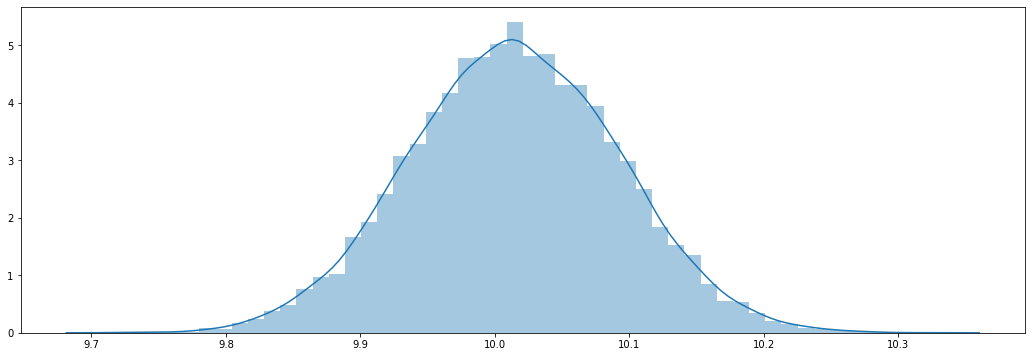

In [36]:
all_data_kWh = list(Smart.kWhRequested)
all_kWh_boot_means = bootstrap_mean(all_data_kWh)

ax, fig = plt.subplots(figsize = (18, 6))
ax = sns.distplot(all_kWh_boot_means)

In [40]:
#variance of bootstrapped means for all tesla users
all_var_kWh = np.var(all_data_kWh)
all_var_boot_kWh = np.var(all_kWh_boot_means)
boot_mean_kWh = np.mean(all_kWh_boot_means)

print('All Smart users sample mean: 10.01')
print(f'All Smart users bootsrtap sample mean: {boot_mean_kWh}')

print(f'Variance of all Smart users charge request: {all_var_kWh}')
print(f'Variance of all Smart users means: {all_var_boot_kWh}')

All Smart users sample mean: 10.01
All Smart users bootsrtap sample mean: 10.014477470497493
Variance of all Smart users charge request: 15.379044704266981
Variance of all Smart users means: 0.0059947890846419015


In [387]:
## finding bootsrtap confidence interval for the sample mean

In [41]:
left = np.percentile(all_kWh_boot_means, 15)
right = np.percentile(all_kWh_boot_means, 85)
left, right

(9.933748168145007, 10.095574431160818)

In [392]:
## bootsrtapping one tesla user